In [1]:
import os 
from glob import glob 
import json 
from shutil import copyfile
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

### Label 개수확인

In [2]:
# JSON 파일 경로
DATA_PATH = './PCOS_DB/Dataset'

# 폴더 내 모든 파일 목록 받기
file_list = os.listdir(DATA_PATH)

# JSON 파일만 필터링 
data_files = [os.path.join(DATA_PATH, file) for file in file_list if file .endswith('.png')]
# json_files = [os.path.join(DATA_PATH, file)  for file in file_list if file .endswith('.json')]


In [7]:
label_dict = {
    'label_0' : 0,
    'label_1' : 0,
    'label_2' : 0,    
}
data_df = pd.DataFrame(columns = ['label', 'file_path'])
for idx,tmp in enumerate(data_files):
    with open(tmp, 'r') as f:
        
        #json 파일에서는 이미지 경로만 가져오면 될듯
        # json_file = json.load(f)
        # imagepath = json_file['imagePath'].replace('\\', '/')
        
        #label 명시
        label = f.name.split('/')[-1].split('_')[0]
        
        #dict로 임시 처리
        tmp_dict = {'label' : label, 'file_path' : tmp}
        
        if int(label) == 0:
            label_dict['label_0'] += 1
            data_df.loc[idx] = tmp_dict

        if int(label) == 1:
            label_dict['label_1'] += 1
            data_df.loc[idx] = tmp_dict

        if int(label) == 2:
            label_dict['label_2'] += 1
            data_df.loc[idx] = tmp_dict
            


# 필요한 것들만 가지고 오기 
print(f"total_data : {label_dict['label_0'] + label_dict['label_1'] + label_dict['label_2']}")

total_data : 2968


In [9]:
data_df.to_csv('./data/data_df.csv')

In [11]:
# 레이블에 따라 데이터 분리
unique_labels = data_df['label'].unique()
unique_labels

array(['0', '1', '2'], dtype=object)

In [14]:
for label in unique_labels:
    label_data = data_df[data_df['label'] == label]
    
    # 데이터를 train valid test로 나누기
    train_data, temp_data = train_test_split(label_data, test_size =0.2, random_state =42) #8(train):2(valid+test)로 먼저 분리
    valid_data, test_data = train_test_split(temp_data, test_size =0.5, random_state =42) # 1:1로 분리 : valid/test
    
    # 데이터를 폴더로 복사
    for idx, row in train_data.iterrows():
        dest_folder = f'./data/train/{label}'
        dest_path = os.path.join(dest_folder, os.path.basename(row['file_path']))
        copyfile(row['file_path'], dest_path)
    for idx, row in valid_data.iterrows():
        dest_folder = f'./data/valid/{label}'
        dest_path = os.path.join(dest_folder, os.path.basename(row['file_path']))
        copyfile(row['file_path'], dest_path)
    
    for idx, row in test_data.iterrows():
        dest_folder = f'./data/test/{label}'
        dest_path = os.path.join(dest_folder, os.path.basename(row['file_path']))
        copyfile(row['file_path'], dest_path)

In [19]:
# check dataset
# 폴더 경로 지정해주기 
train_path = './data/train'
valid_path = './data/valid'
test_path = './data/test'

def cnt_files_in_folder(path):
    cnt = 0
    
    # 폴더 내부 모든 하위 폴더 및 파일 확인
    for root, dirs, files in os.walk(path):
        cnt += len(files)
        
    return cnt 

# 폴더 내 모든 파일 개수 확인
print(f"train : {cnt_files_in_folder(train_path)}, valid : {cnt_files_in_folder(valid_path)}, test : {cnt_files_in_folder(test_path)} ")

print("="*100)
print(f"train_0 : {cnt_files_in_folder('./data/train/0')}, train_1 : {cnt_files_in_folder('./data/train/1')}, train_2 : {cnt_files_in_folder('./data/train/2')},")
print("="*100)
print(f"valid_0 : {cnt_files_in_folder('./data/valid/0')}, valid_1 : {cnt_files_in_folder('./data/valid/1')}, valid_2 : {cnt_files_in_folder('./data/valid/2')},")
print("="*100)
print(f"test_0 : {cnt_files_in_folder('./data/test/0')}, test_1 : {cnt_files_in_folder('./data/test/1')}, test_2 : {cnt_files_in_folder('./data/test/2')},")

train : 2373, valid : 297, test : 298 
train_0 : 1647, train_1 : 433, train_2 : 293,
valid_0 : 206, valid_1 : 54, valid_2 : 37,
test_0 : 206, test_1 : 55, test_2 : 37,


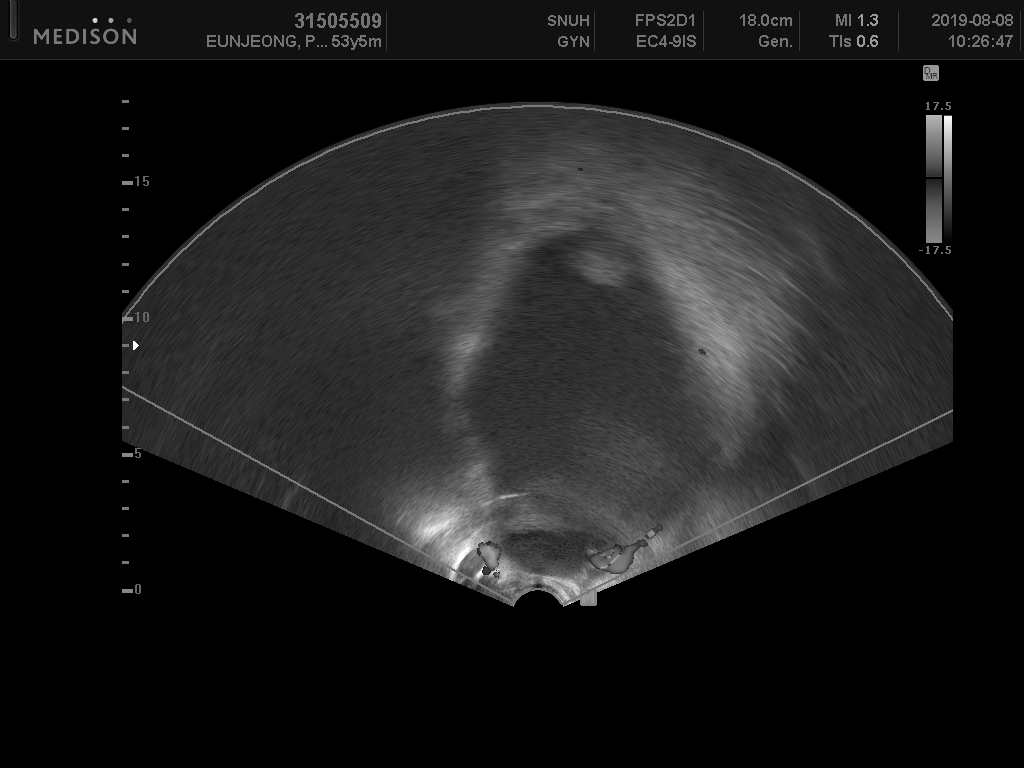

In [29]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

image_path = './data/train/1/1_R1015_00003.png'
image = Image.open(image_path)
image

<PIL.PngImagePlugin.PngImageFile image mode=L size=1024x768 at 0x18197276700>
original : (768, 1024) crop : (768, 1024, 3)


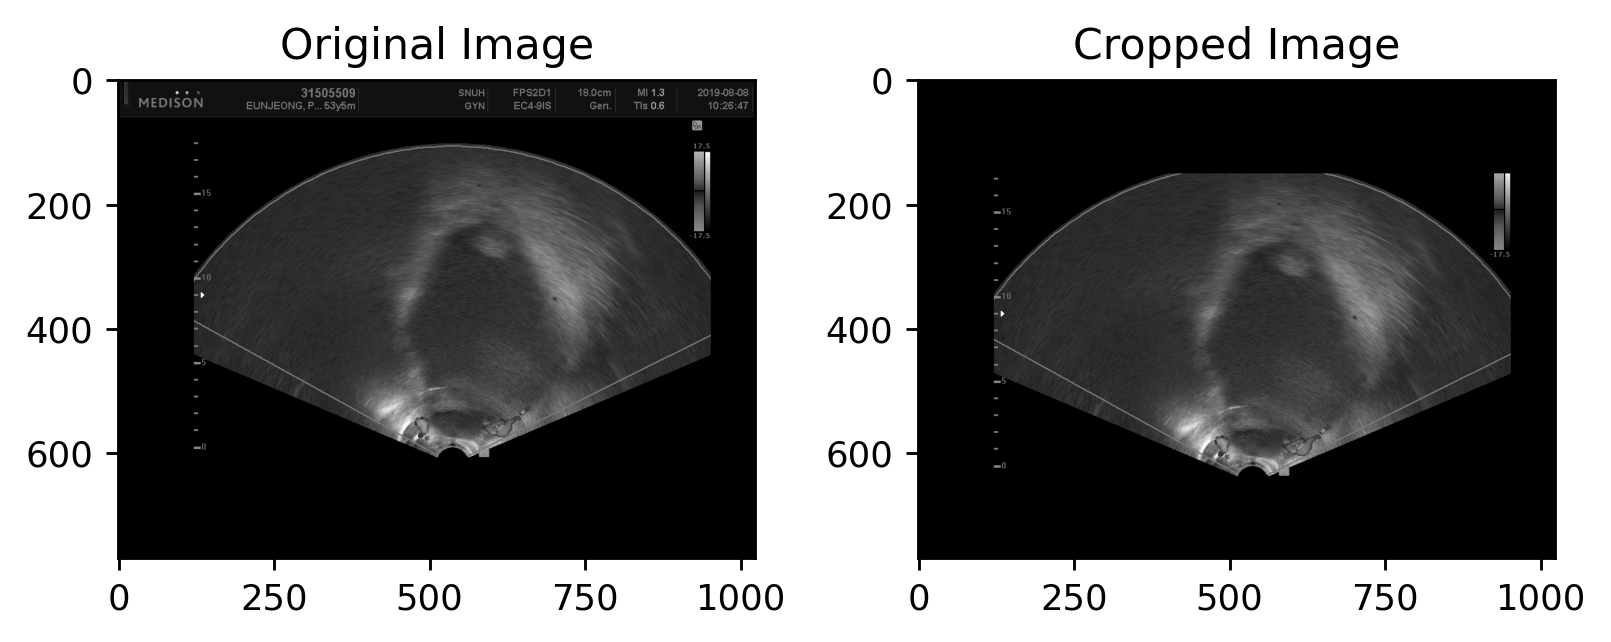

In [32]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

image_path = './data/train/1/1_R1015_00003.png'

# Open the original image again
with Image.open(image_path) as img:
    # Crop the ultrasound portion
    cropped_ultrasound = img.crop((0, 120, img.width, img.height - 50))
    
    # Create a new image with the same size as the original and a black background
    black_bg_img = Image.new("RGB", img.size, (0, 0, 0))
    
    # Paste the cropped ultrasound image onto the black background at the same position
    black_bg_img.paste(cropped_ultrasound, (0, 150))
    
    print(img)
    
    # Save the new image with a black background
    # black_bg_img_path = "/mnt/data/black_background_ultrasound.png"
    # black_bg_img.save(black_bg_img_path)
    
print(f'original : {np.array(img).shape} crop : {np.array(black_bg_img).shape}')

# Convert images to NumPy arrays and normalize intensity
img = np.array(img) / 255.
black_bg_img = np.array(black_bg_img) / 255.

# Plot the images
plt.figure(dpi=256)
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(black_bg_img, cmap='gray')
plt.title('Cropped Image')

# Set subtitle below the subplots

# Display intensity ranges in the legend
plt.tight_layout()
plt.show()
plt.close()


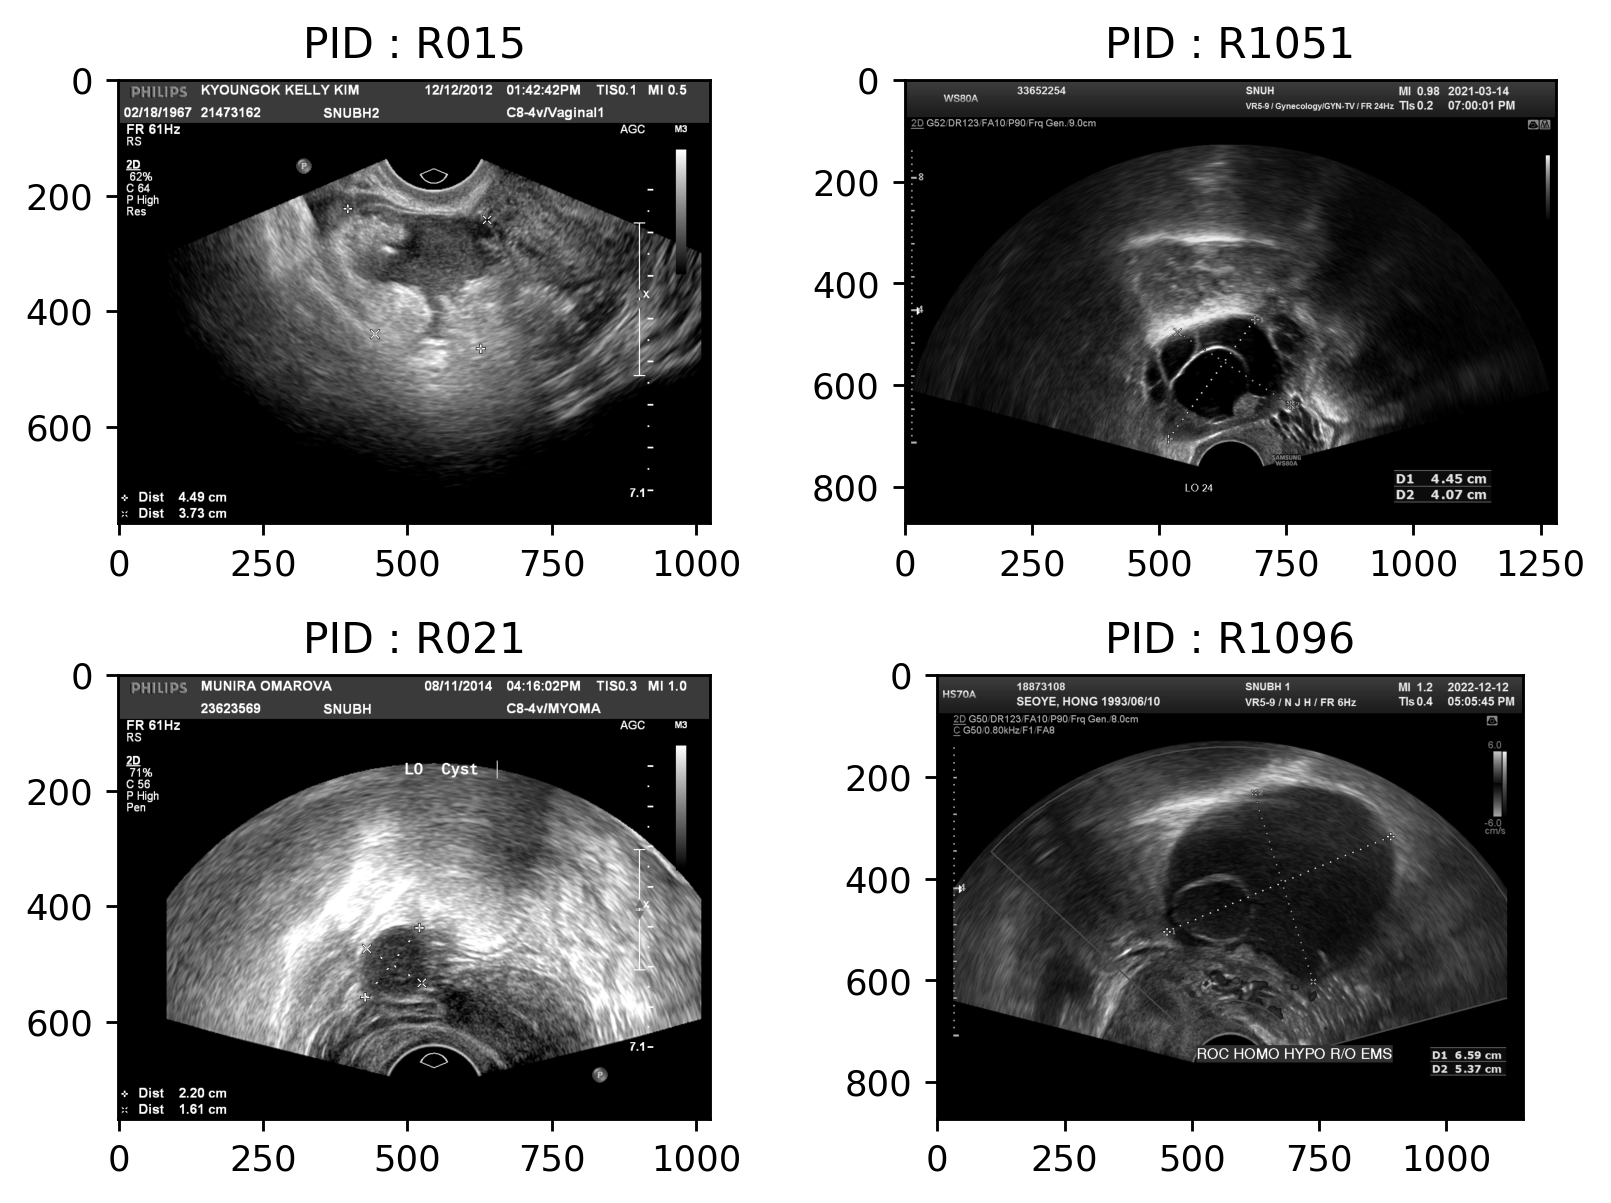

In [25]:
normal_path = './data/train/0/0_R015_00001.png'
abnormal_path = './data/train/1/1_R1051_00001.png'
normal_2_path = './data/train/0/0_R021_00001.png'
abnormal_2_path = './data/train/1/1_R1096_00002.png'

normal = Image.open(normal_path)
abnormal = Image.open(abnormal_path)
normal_2 = Image.open(normal_2_path)
abnormal_2 = Image.open(abnormal_2_path)

plt.figure(dpi = 256)
plt.subplot(221)
plt.imshow(normal, cmap ='gray')
plt.title(f"PID : {normal_path.split('/')[-1].split('_')[1]}")
plt.subplot(222)
plt.imshow(abnormal, cmap ='gray')
plt.title(f"PID : {abnormal_path.split('/')[-1].split('_')[1]}")
plt.subplot(223)
plt.imshow(normal_2, cmap ='gray')
plt.title(f"PID : {normal_2_path.split('/')[-1].split('_')[1]}")
plt.subplot(224)
plt.imshow(abnormal_2, cmap ='gray')
plt.title(f"PID : {abnormal_2_path.split('/')[-1].split('_')[1]}")
plt.tight_layout()
plt.show()
